In [1]:
import pandas as pd
import json
from analytical_solution import *
from halton_points import *
from expressions import * 

import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import *

from mpl_toolkits.axes_grid1 import make_axes_locatable

import plotly.graph_objects as go

In [2]:
with open('solutionTPS.json', 'r') as f:
    dataTPS = json.load(f)

with open('solutionMQ.json', 'r') as f:
    dataMQ = json.load(f)
    
with open('solutionTPS_arb_pol.json', 'r') as f:
    dataTPSarb = json.load(f)

In [3]:
def extract_param(data, t):
    nu = data['nu']
    RBF = data['RBF']
    Mi = np.array(data['points']['Interior'])
    Mb = np.array(data['points']['boundary'])
    t = t
    uh = np.array(data['solution'][str(t)])

    sol_exact = exact_solution(Mi, nu)
    ue = sol_exact.u(t)

    error = abs(uh-ue)/ue

    return nu, RBF, Mi, Mb, t, uh, ue, error

In [4]:
#nf = (2**2+1)**2
#r = HaltonPoints(2, nf).haltonPoints()
##fxl = r.copy()
#fxl[:, 0] = 0
#fxr = r.copy()
#fxr[:, 0] = 1
#fyu = r.copy()
#fyu[:, 1] = 0
#fyd = r.copy()
#fyd[:, 1] = 1
#Mb = np.vstack((fxl, fxr, fyu, fyd))

#Mi = HaltonPoints(2, 81).haltonPoints()
#domain = create_domain(Mi, radius=0.15, c_y=0.5, c_x=0.5)

#Mi, new_boundary = domain.setup(domain='circle_centre', bound_points=40)
#Mb = np.vstack((Mb, new_boundary))

#X = np.vstack((Mi, Mb))

#sol_exact = exact_solution(Mi, 0.01)
#ue = sol_exact.u(0.45)
#ue = np.vstack((ue, np.zeros(Mb.shape)))

#x = np.vstack((X, new_boundary))[:,0]
#y = np.vstack((X, new_boundary))[:, 1]
#z = ue[:, 0]

In [5]:
#domain = create_domain(Mi, radius=0.15, c_y=0.5, c_x=0.5)
nu, RBF, Mi, Mb, t, uh, ue, error = extract_param(dataMQ, 0.05)
X = Mi.copy()

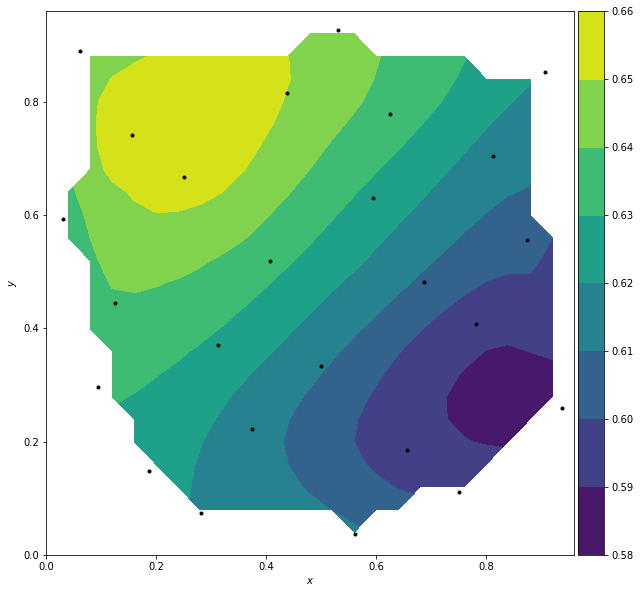

In [8]:
# data coordinates and values
x = X[:,0]
y = X[:,1]
z = uh[:, 0]

# target grid to interpolate to
xi = yi = np.arange(0, 1, 1/(X.shape[0]))
xi,yi = np.meshgrid(xi,yi)

# set mask
#mask = np.sqrt((xi - domain.c_x)**2 + (yi - domain.c_y)**2) < domain.radius

# interpolate
zi = griddata((x,y),z,(xi,yi), method='cubic')

# mask out the field
#zi[mask] = np.nan

# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = plt.contourf(xi,yi,zi)
plt.plot(x,y,'k.')
plt.xlabel('$x$')
plt.ylabel('$y$')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.savefig('interpolated.png',dpi=100)
plt.show()

In [9]:
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi)])
fig.update_layout(title='Approximate solution of Burgers equation t=0.95', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True), colorscale="viridis")

fig.show()